## Carga de Librerías

In [3]:
# Cargamos las librerías que consideremos necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import Pipeline
%pip install xgboost
import xgboost as xgb

Note: you may need to restart the kernel to use updated packages.


## Carga de Datos

In [4]:
# Cargamos la descripción de las variables que estudiaremos
df_variables = pd.read_csv('D:\DEV\Python\M4_07_Taller_Producto_Datos\ASSETS\descripcion_variables.csv', encoding='latin1')
df_variables

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_6968\2550454701.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_variables = pd.read_csv('D:\DEV\Python\M4_07_Taller_Producto_Datos\ASSETS\descripcion_variables.csv', encoding='latin1')


,Variable,Unidades,Descripción
0,nmot_w,rpm,Velocidad angular del Motor
1,mshfm_w,g/s,Flujo de Aire
2,rl_w,%,Carga del Motor Actual
3,rlsol_w,%,Carga del Motor Especificada
4,pvdkds_w,mbar Absolutos,Presión de Soplado del Turbo Actual
5,plsol_w,mbar Absolutos,Presión de Soplado del Turbo Especificada
6,lamsoni_w,Adimensional,Lambda Actual
7,lamsbg_w,Adimensional,Lambda Especificada
8,tikatm_w,Grados C,Temp Gas Escape: Dentro del Catalizador


In [5]:
# Cargamos el dataset que estudiaremos
df_log = pd.read_csv('D:\DEV\Python\M4_07_Taller_Producto_Datos\ASSETS\logs_me7logger.csv')
df_log['tikatm_w'] = df_log['tikatm_w']+273.15 # Para pasarlo a Kelvin
df_log.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_6968\416647679.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_log = pd.read_csv('D:\DEV\Python\M4_07_Taller_Producto_Datos\ASSETS\logs_me7logger.csv')


,nmot_w,mshfm_w,rl_w,rlsol_w,pvdkds_w,plsol_w,lamsoni_w,lamsbg_w,tikatm_w
0,2909.25,20.5000,36.6797,37.3594,1073.59,1010.82,0.993654,1.0,908.207
1,2905.75,20.8889,37.0313,38.3438,1073.59,1010.82,0.988527,1.0,908.207
2,2915.75,20.9445,37.4063,39.3281,1076.64,1010.82,0.994875,1.0,908.207
3,2913.00,21.5278,37.8750,40.4766,1079.65,1010.82,0.997316,1.0,908.012
4,2910.00,21.8889,38.4141,43.3125,1079.65,1010.78,0.998537,1.0,908.012


## EDA Estático

In [6]:
# Hago un pequeño estudio del total de los datos
display(df_log.describe())
df_log.info()

,nmot_w,mshfm_w,rl_w,rlsol_w,pvdkds_w,plsol_w,lamsoni_w,lamsbg_w,tikatm_w
count,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
mean,2246.090347,26.505152,45.080624,49.192235,1199.010396,1182.335827,1.521972,0.979654,989.010657
std,1292.767086,43.238355,44.514785,52.016219,326.436704,404.542027,1.173552,0.074666,57.598930
min,686.750000,0.000000,10.945300,12.750000,1021.990000,1005.230000,0.750001,0.796876,906.273000
25%,1500.187500,4.361110,13.289100,14.250000,1036.367500,1007.460000,0.951173,1.000000,951.722000
50%,2020.250000,6.847230,23.988300,23.332000,1049.340000,1009.380000,0.997316,1.000000,969.281000
75%,2323.187500,22.638900,57.275375,54.685575,1149.530000,1009.960000,1.043950,1.000000,994.769000
max,6478.500000,159.695000,176.297000,185.414000,2358.750000,2349.530000,4.000010,1.046880,1119.066000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nmot_w     2020 non-null   float64
 1   mshfm_w    2020 non-null   float64
 2   rl_w       2020 non-null   float64
 3   rlsol_w    2020 non-null   float64
 4   pvdkds_w   2020 non-null   float64
 5   plsol_w    2020 non-null   float64
 6   lamsoni_w  2020 non-null   float64
 7   lamsbg_w   2020 non-null   float64
 8   tikatm_w   2020 non-null   float64
dtypes: float64(9)
memory usage: 142.2 KB


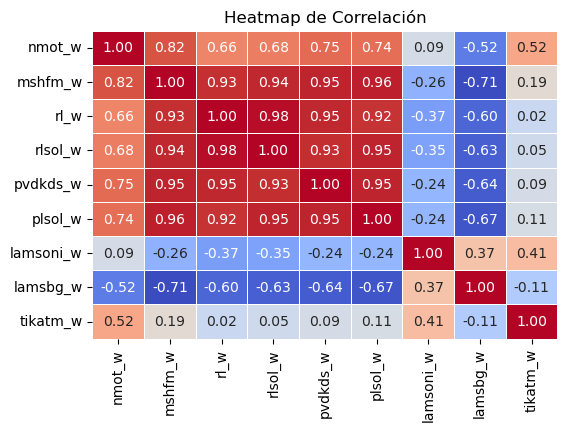

In [7]:
# Correlación entre variables
plt.figure(figsize=(6, 4))
sns.heatmap(df_log.corr(), annot=True, cmap='coolwarm', cbar = False, fmt='.2f', linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()
#sns.pairplot(df_log)
#plt.show()

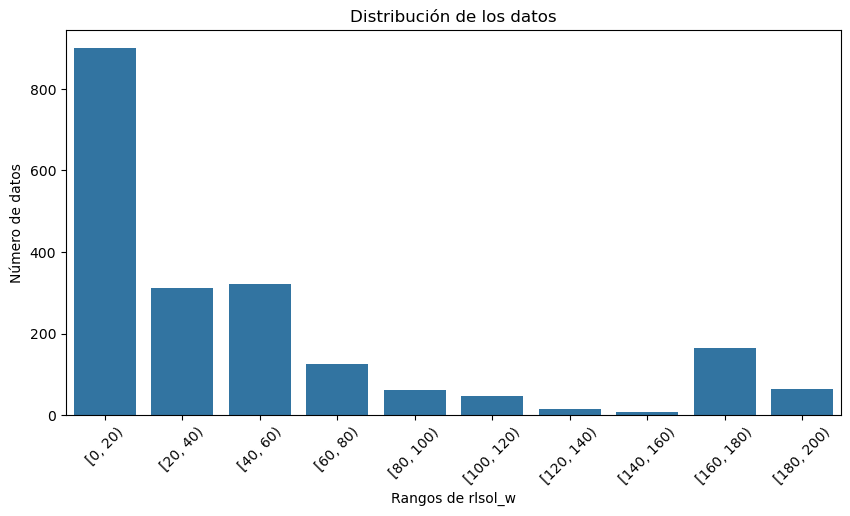

In [8]:
# Distribución de los datos por niveles de carga

# Definición de bins
bins = np.arange(0, (max(df_log['rlsol_w']) // 20 + 1) * 20 + 20, 20).astype(np.int64) # Para que se amolde a los datos y siempre coja múltiplos de 20
df_distribucion_datos = df_log.copy()
df_distribucion_datos['rlsol_w_bin'] = pd.cut(df_distribucion_datos['rlsol_w'], bins, right=False)

# Cuento el número de líneas por cada bin
bin_counts = df_distribucion_datos['rlsol_w_bin'].value_counts().sort_index()

# Creo el gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=bin_counts.index.astype(str), y=bin_counts.values)
plt.xlabel("Rangos de rlsol_w")
plt.xticks(rotation=45)
plt.ylabel("Número de datos")
plt.title("Distribución de los datos")
plt.show()


## EDA Dinámico

In [9]:
# Limitación interactiva de Carga por Streamlit

corte_inf_carga = 50
corte_sup_carga = 200

In [10]:
# Hago un pequeño estudio de los datos acotados
display(df_log.loc[(df_log['rlsol_w'] >= corte_inf_carga) & (df_log['rlsol_w'] <= corte_sup_carga)].describe())
df_log.loc[(df_log['rlsol_w'] >= corte_inf_carga) & (df_log['rlsol_w'] <= corte_sup_carga)].info()

,nmot_w,mshfm_w,rl_w,rlsol_w,pvdkds_w,plsol_w,lamsoni_w,lamsbg_w,tikatm_w
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,3334.122126,79.582923,108.819969,124.426253,1606.375536,1682.294502,0.930853,0.924130,986.628412
std,1655.328769,57.256176,41.090427,49.288539,425.793864,544.503423,0.214477,0.092868,47.866274
min,755.000000,3.138890,22.804700,50.015600,1021.990000,1005.550000,0.750001,0.796876,906.273000
25%,1946.000000,28.777800,71.044950,73.447250,1256.652500,1072.350000,0.808351,0.812501,953.514250
50%,2480.875000,38.861100,97.687500,114.715000,1406.270000,1593.495000,0.976686,1.000000,976.732000
75%,4958.125000,147.250000,147.510000,175.078500,2003.310000,2239.470000,1.004703,1.000000,1008.431000
max,6414.750000,159.695000,176.297000,185.414000,2358.750000,2349.530000,4.000010,1.000000,1104.906000


<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 33 to 1829
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nmot_w     522 non-null    float64
 1   mshfm_w    522 non-null    float64
 2   rl_w       522 non-null    float64
 3   rlsol_w    522 non-null    float64
 4   pvdkds_w   522 non-null    float64
 5   plsol_w    522 non-null    float64
 6   lamsoni_w  522 non-null    float64
 7   lamsbg_w   522 non-null    float64
 8   tikatm_w   522 non-null    float64
dtypes: float64(9)
memory usage: 40.8 KB


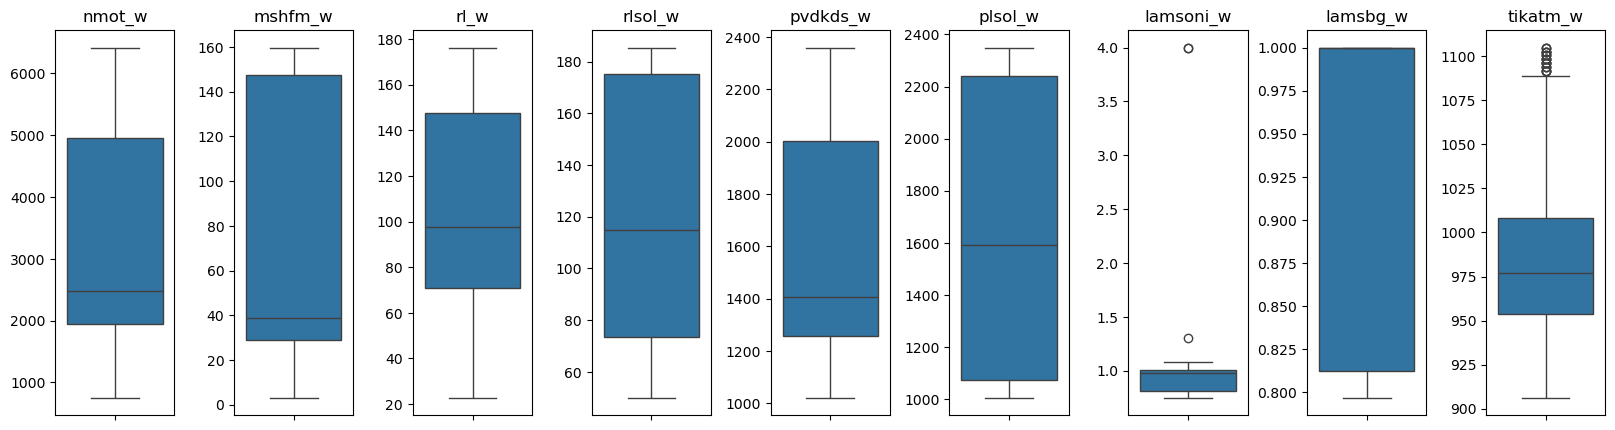

In [11]:
# Crear boxplots separados para cada variable con los datos acotados

# Mostrarlos juntos
num_columns = len(df_log.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(20, 5))  # 1 fila, num_columns columnas

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.5)

# Crear boxplots separados para cada variable
for i, column in enumerate(df_log.columns):
    sns.boxplot(df_log.loc[(df_log['rlsol_w'] >= corte_inf_carga) & (df_log['rlsol_w'] <= corte_sup_carga), column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('')  # Quita el título del eje Y

# Mostrar la figura
plt.show()

# Ojo, tikatim_w está en [K] para operar correctamente con ella

## Modelos

In [12]:
# Hago los folds para las validaciones cruzadas
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
# Designación de variables predictivas y predictoras
X = (df_log.loc[(df_log['rlsol_w'] >= corte_inf_carga) & (df_log['rlsol_w'] <= corte_sup_carga)]).drop(columns=['tikatm_w'])
y = df_log.loc[(df_log['rlsol_w'] >= corte_inf_carga) & (df_log['rlsol_w'] <= corte_sup_carga)]['tikatm_w']

In [14]:
# Regresión 

modelo_reg = LinearRegression()
modelo_reg.fit(X, y)
y_pred_reg = modelo_reg.predict(X)

# Calculo métricas de error
r2_reg = r2_score(y, y_pred_reg)
mse_reg = mean_squared_error(y, y_pred_reg)
me_reg = mse_reg**(1/2)

# Imprimo resultados
print(f"R²: {r2_reg:.4f}")
print(f"MSE: {mse_reg:.2f}°C²")
print(f"Error medio: {me_reg:.2f}°C")

R²: 0.8677
MSE: 302.49°C²
Error medio: 17.39°C


In [15]:
# Modelo por puntos (nodos) e interpolación lineal entre ellos (splines de grado 1)
# Multipunto: mtp

# Definir el rango de exploración de hiperparámetros
param_grid_mtp = {
    'spline__degree': [1],
    'spline__n_knots': range(1, 51, 2)
}

# Crear un pipeline que primero transforme los datos con splines y luego aplique una regresión lineal
modelo_pipeline_mtp = Pipeline([
    ('spline', SplineTransformer()),
    ('regression', LinearRegression())
])

# Configurar la búsqueda de hiperparámetros
grid_search_mtp = GridSearchCV(
    estimator=modelo_pipeline_mtp,
    param_grid=param_grid_mtp,
    cv=kf,
    scoring="r2",
    n_jobs=-1,  # para usar todos los núcleos
)

# Ajustar el modelo a los datos
grid_search_mtp.fit(X, y)

# Imprimir los mejores parámetros y el R²
print(f"Mejores parámetros: {grid_search_mtp.best_params_}")
print(f"R²: {grid_search_mtp.best_score_:.4f}")

# Asignar los hiperparámetros óptimos para futuros cálculos
modelo_mtp = grid_search_mtp.best_estimator_

# Calcular errores más intuitivos
y_pred_cv_mtp = cross_val_predict(modelo_mtp, X, y, cv=kf)
mse_mtp = mean_squared_error(y, y_pred_cv_mtp)
me_mtp = mse_mtp**(1/2)

# Imprimir resultados
print(f"MSE: {mse_mtp:.2f}°C²")
print(f"Error medio: {me_mtp:.2f}°C")

Mejores parámetros: {'spline__degree': 1, 'spline__n_knots': 5}
R²: 0.9589
MSE: 76.65°C²
Error medio: 8.75°C


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, route

In [16]:
range(5, 100, 5)

range(5, 100, 5)

In [19]:
# XGBoost

modelo_xgb = xgb.XGBRegressor()

# Rango de exploración hiperparámetros
param_grid_xgb = {
    'max_depth': [6,8,10,12],
    'learning_rate': [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.20, 0.25, 0.30],
    'n_estimators': [100, 150, 175],
}

grid_search_xgb = GridSearchCV(
    estimator=modelo_xgb,
    param_grid=param_grid_xgb,
    cv=kf,
    scoring="r2",
    n_jobs=-1, #para usar todos los núcleos
    )

grid_search_xgb.fit(X, y)
print(f"Mejores parámetros: {grid_search_xgb.best_params_}")
print(f"R²: {grid_search_xgb.best_score_:.4f}")

# Asigno los hiperparámetros óptimos para futuros cálculos
modelo_xgb = grid_search_xgb.best_estimator_

# Calculo errores más intuitivos
y_pred_cv_xgb = cross_val_predict(modelo_xgb, X, y, cv=kf)
mse_xgb = mean_squared_error(y, y_pred_cv_xgb)
me_xgb = mse_xgb**(1/2)

# Imprimo resultados
print(f"MSE: {mse_xgb:.2f}°C²")
print(f"Error medio: {me_xgb:.2f}°C")

Mejores parámetros: {'learning_rate': 0.25, 'max_depth': 6, 'n_estimators': 150}
R²: 0.9904
MSE: 21.93°C²
Error medio: 4.68°C


## Predicciones

In [357]:
# Añado las predicciones como nuevas columnas a df_log_pred, copia de df_log
df_log_pred = df_log.copy()
features = [col for col in df_log_pred.columns if col not in ['tikatm_w', 'tikatm_reg', 'tikatm_mtp', 'tikatm_xgb']]
df_log_pred['tikatm_reg'] = df_log_pred[features].apply(lambda row: modelo_reg.predict([row.values])[0], axis=1)
df_log_pred['tikatm_mtp'] = df_log_pred[features].apply(lambda row: modelo_mtp.predict([row.values])[0], axis=1)
df_log_pred['tikatm_xgb'] = df_log_pred[features].apply(lambda row: modelo_xgb.predict([row.values])[0], axis=1)

# Creo columnas con errores relativos
df_log_pred['error_rel_reg'] = abs((df_log_pred['tikatm_w'] - df_log_pred['tikatm_reg'])/(df_log_pred['tikatm_w']))*100
df_log_pred['error_rel_mtp'] = abs((df_log_pred['tikatm_w'] - df_log_pred['tikatm_mtp'])/(df_log_pred['tikatm_w']))*100
df_log_pred['error_rel_xgb'] = abs((df_log_pred['tikatm_w'] - df_log_pred['tikatm_xgb'])/(df_log_pred['tikatm_w']))*100

# Creo columnas con errores absolutos
df_log_pred['error_abs_reg'] = abs(df_log_pred['tikatm_w'] - df_log_pred['tikatm_reg'])
df_log_pred['error_abs_mtp'] = abs(df_log_pred['tikatm_w'] - df_log_pred['tikatm_mtp'])
df_log_pred['error_abs_xgb'] = abs(df_log_pred['tikatm_w'] - df_log_pred['tikatm_xgb'])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not ha

## Errores

In [358]:
# Definir los bins para discretizar rlsol_w y nmot_w
rlsol_bins = np.arange(0, 190+10, 10)
nmot_bins = np.arange(0, 6500+500, 500)

# Copiar df_log_pred para no afectarlo con los bins
df_bins = df_log_pred.copy()

# Asignar cada valor de rlsol_w y nmot_w a un bin
df_bins['rlsol_bin'] = pd.cut(df_bins['rlsol_w'], bins=rlsol_bins, labels=np.round(rlsol_bins[:-1], 2))
df_bins['nmot_bin'] = pd.cut(df_bins['nmot_w'], bins=nmot_bins, labels=np.round(nmot_bins[:-1], 2))

# Colormap personalizado
colors = ["green", "yellow", "red"]
n_bins = 100  # Número de segmentos de color
cmap_name = "green_yellow_red"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\1435758207.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_tikatm = df_bins.pivot_table(
C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\1435758207.py:5: FutureWarning: The provided callable <function mean at 0x000001C2C0AEC220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_tikatm = df_bins.pivot_table(


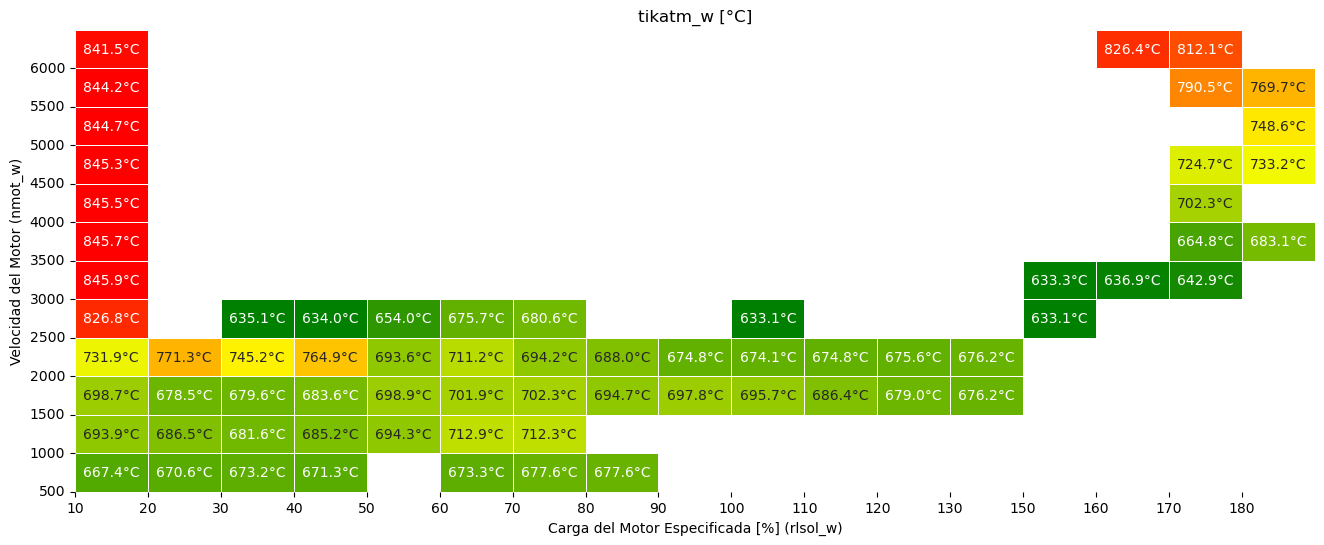

In [359]:
# Puesta en contexto
# tikatk_w en f(nmot y rlsol_w)

# Crear la tabla pivote con el error relativo promedio
heatmap_tikatm = df_bins.pivot_table(
    index='nmot_bin', 
    columns='rlsol_bin', 
    values='tikatm_w',
    aggfunc=np.mean
)

# Convertir los índices a valores numéricos para mejor visualización
heatmap_tikatm.index = heatmap_tikatm.index.astype(np.int64)
heatmap_tikatm.columns = heatmap_tikatm.columns.astype(np.int64)

annot_tikatm = heatmap_tikatm.copy().astype(str)
for i in range(heatmap_tikatm.shape[0]):
    for j in range(heatmap_tikatm.shape[1]):
            # Convertir de Kelvin a Celsius
            heatmap_tikatm.iloc[i, j] = heatmap_tikatm.iloc[i, j] - 273.15
            annot_tikatm.iloc[i, j] = f"{heatmap_tikatm.iloc[i, j]:.1f}°C"

# Crear el heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_tikatm, cmap=custom_cmap, cbar=False, annot=annot_tikatm, fmt='', linewidths=0.5)

# Añadir título y etiquetas
plt.title('tikatm_w [°C]')
plt.xlabel('Carga del Motor Especificada [%] (rlsol_w)')
plt.ylabel('Velocidad del Motor (nmot_w)')

plt.gca().invert_yaxis() # Poner el origen del eje Y abajo

# Ajustar las etiquetas del eje X a la izquierda
plt.xticks(
    ticks=np.arange(len(heatmap_tikatm.columns)) + 0,
    labels=heatmap_tikatm.columns,
    rotation=0,
)

# Ajustar las etiquetas del eje y abajo
plt.yticks(
    ticks=np.arange(len(heatmap_tikatm.index)) + 0,
    labels=heatmap_tikatm.index,
    rotation=0,
)

# Mostrar el gráfico
plt.show()

In [360]:
# Las celdas rojas en cargas bajas aparentemente no tienen sentido
# Por qué ese cambio tan abrupto? y por qué no hay muestras para esas rpm en la segunda columna de carga?
# Los ensayos que típicamente se hacen cuando se modifica el SW de control de motor de un coche, consisten en lanzadas en 3ª marcha con el acelerador a fondo desde unas 2500rpm hasta la zona más alta del tacómetro
# Cuando se llega, se suelta el acelerador y se deja el coche reducir de velocidad en punto muerto para medir las pérdidas mecánicas de potencia
# Con lo cual, las rpm van a bajar muy rápizamente a ralentí, pero viniento de una situación de estrés máximo y las temperaturas del gas y elementos de escape seguirán siendo muy altas
# Entre 500 y 2500rpm ya apreciames temperaturas más moderadas debido a que hay mucho dato de "coasting"

# Para hacer un modelo de temperatura de escape deberían haberse contemplado más variables y hacer ensayos variados manteniendo una variable fija y variando las demás para tener toda la zona del gráfico completa y con una densidad homogénea de datos
# Pero para este proyecto, tiraremos con el dataset que tenemos.

C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\1280356651.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_reg_rel = df_bins.pivot_table(
C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\1280356651.py:4: FutureWarning: The provided callable <function mean at 0x000001C2C0AEC220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_reg_rel = df_bins.pivot_table(
C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\1280356651.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_reg_abs = df_bins.pivot_table(
C:\Users\

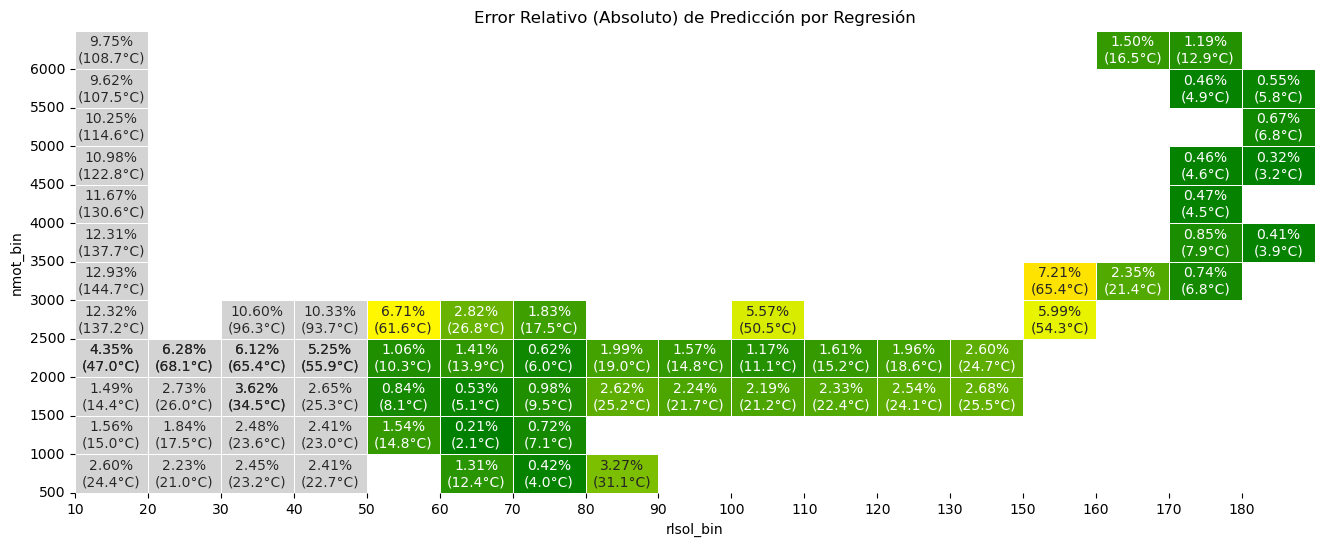

In [361]:
# Errores de Regresión

# Crear la tabla pivote con el error relativo promedio
heatmap_reg_rel = df_bins.pivot_table(
    index='nmot_bin', 
    columns='rlsol_bin', 
    values='error_rel_reg',
    aggfunc=np.mean
)

# Crear la tabla pivote con el error absoluto promedio
heatmap_reg_abs = df_bins.pivot_table(
    index='nmot_bin', 
    columns='rlsol_bin', 
    values='error_abs_reg',
    aggfunc=np.mean
)

# Convertir los índices a valores numéricos para mejor visualización
heatmap_reg_rel.index = heatmap_reg_rel.index.astype(np.int64)
heatmap_reg_rel.columns = heatmap_reg_rel.columns.astype(np.int64)
heatmap_reg_abs.index = heatmap_reg_abs.index.astype(np.int64)
heatmap_reg_abs.columns = heatmap_reg_abs.columns.astype(np.int64)

# Combinar los datos de ambas tablas en una sola cadena de texto para cada celda
annot_combinado_reg = heatmap_reg_rel.copy().astype(str)
for i in range(heatmap_reg_rel.shape[0]):
    for j in range(heatmap_reg_rel.shape[1]):
        # Aplico "Fuera de Rango"
        if heatmap_reg_rel.iloc[i, j] > 999 or heatmap_reg_abs.iloc[i, j] > 999:
            annot_combinado_reg.iloc[i, j] = "F/R"  # Fuera de Rango, para no ensuciar el gráfico con valores que se salen de la celda
        else:
            annot_combinado_reg.iloc[i, j] = f"{heatmap_reg_rel.iloc[i, j]:.2f}%\n({heatmap_reg_abs.iloc[i, j]:.1f}°C)"

# Crear el heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_reg_rel, cmap=custom_cmap, cbar=False, annot=annot_combinado_reg, fmt='', linewidths=0.5)

# Añadir título y etiquetas
plt.title('Error Relativo (Absoluto) de Predicción por Regresión')
plt.xlabel('Carga del Motor Especificada [%] (rlsol_w)')
plt.ylabel('Velocidad del Motor (nmot_w)')

# Crear la máscara para las celdas fuera del rango de estudio
# Sólo esta vez. La reutilizaré de ahora en adelante
mask = (heatmap_reg_rel.columns < corte_inf_carga) | (heatmap_reg_rel.columns >= corte_sup_carga)
gray_mask = np.zeros_like(heatmap_reg_rel, dtype=bool)
gray_mask[:, mask] = True

# Heatmap gris
sns.heatmap(
    heatmap_reg_rel, 
    cmap=['lightgray'],
    cbar=False, 
    annot=annot_combinado_reg, 
    fmt='', 
    linewidths=0.5,
    mask=~gray_mask,  # Invertir la máscara para aplicar el gris solo a las celdas fuera del rango
)
plt.gca().invert_yaxis() # Poner el origen del eje Y abajo

# Ajustar las etiquetas del eje X a la izquierda
plt.xticks(
    ticks=np.arange(len(heatmap_reg_rel.columns)) + 0,
    labels=heatmap_reg_rel.columns,
    rotation=0,
)

# Ajustar las etiquetas del eje y abajo
plt.yticks(
    ticks=np.arange(len(heatmap_reg_rel.index)) + 0,
    labels=heatmap_reg_rel.index,
    rotation=0,
)

# Mostrar el gráfico
plt.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\2909883779.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_mtp_rel = df_bins.pivot_table(
C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\2909883779.py:4: FutureWarning: The provided callable <function mean at 0x000001C2C0AEC220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_mtp_rel = df_bins.pivot_table(
C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\2909883779.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_mtp_abs = df_bins.pivot_table(
C:\Users\

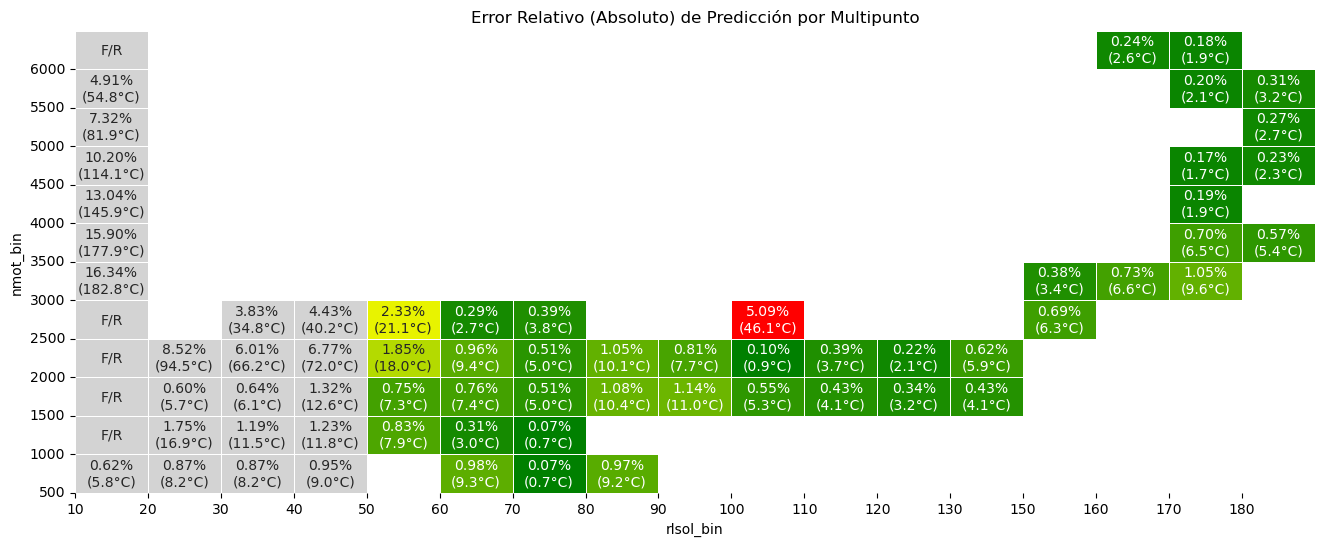

In [362]:
# Errores de Multipunto

# Crear la tabla pivote con el error relativo promedio
heatmap_mtp_rel = df_bins.pivot_table(
    index='nmot_bin', 
    columns='rlsol_bin', 
    values='error_rel_mtp',
    aggfunc=np.mean
)

# Crear la tabla pivote con el error absoluto promedio
heatmap_mtp_abs = df_bins.pivot_table(
    index='nmot_bin', 
    columns='rlsol_bin', 
    values='error_abs_mtp',
    aggfunc=np.mean
)

# Convertir los índices a valores numéricos para mejor visualización
heatmap_mtp_rel.index = heatmap_mtp_rel.index.astype(np.int64)
heatmap_mtp_rel.columns = heatmap_mtp_rel.columns.astype(np.int64)
heatmap_mtp_abs.index = heatmap_mtp_abs.index.astype(np.int64)
heatmap_mtp_abs.columns = heatmap_mtp_abs.columns.astype(np.int64)

# Combinar los datos de ambas tablas en una sola cadena de texto para cada celda
annot_combinado_mtp = heatmap_mtp_rel.copy().astype(str)
for i in range(heatmap_mtp_rel.shape[0]):
    for j in range(heatmap_mtp_rel.shape[1]):
        # Aplico "Fuera de Rango"
        if heatmap_mtp_rel.iloc[i, j] > 999 or heatmap_mtp_abs.iloc[i, j] > 999:
            annot_combinado_mtp.iloc[i, j] = "F/R"  # Fuera de Rango, para no ensuciar el gráfico con valores que se salen de la celda
        else:
            annot_combinado_mtp.iloc[i, j] = f"{heatmap_mtp_rel.iloc[i, j]:.2f}%\n({heatmap_mtp_abs.iloc[i, j]:.1f}°C)"

# Crear el heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_mtp_rel, cmap=custom_cmap, cbar=False, annot=annot_combinado_mtp, fmt='', linewidths=0.5, mask=gray_mask)  # Aplicar la máscara para las celdas en gris)

# Añadir título y etiquetas
plt.title('Error Relativo (Absoluto) de Predicción por Multipunto')
plt.xlabel('Carga del Motor Especificada [%] (rlsol_w)')
plt.ylabel('Velocidad del Motor (nmot_w)')

# Heatmap gris
sns.heatmap(
    heatmap_reg_rel, 
    cmap=['lightgray'],
    cbar=False, 
    annot=annot_combinado_mtp, 
    fmt='', 
    linewidths=0.5,
    mask=~gray_mask,  # Invertir la máscara para aplicar el gris solo a las celdas fuera del rango
)
plt.gca().invert_yaxis() # Poner el origen del eje Y abajo

# Ajustar las etiquetas del eje X a la izquierda
plt.xticks(
    ticks=np.arange(len(heatmap_mtp_rel.columns)) + 0,
    labels=heatmap_mtp_rel.columns, 
    rotation=0,
)

# Ajustar las etiquetas del eje y abajo
plt.yticks(
    ticks=np.arange(len(heatmap_mtp_rel.index)) + 0,
    labels=heatmap_mtp_rel.index,
    rotation=0,
)

# Mostrar el gráfico
plt.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\1630032228.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_xgb_rel = df_bins.pivot_table(
C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\1630032228.py:4: FutureWarning: The provided callable <function mean at 0x000001C2C0AEC220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_xgb_rel = df_bins.pivot_table(
C:\Users\Diego\AppData\Local\Temp\ipykernel_13040\1630032228.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_xgb_abs = df_bins.pivot_table(
C:\Users\

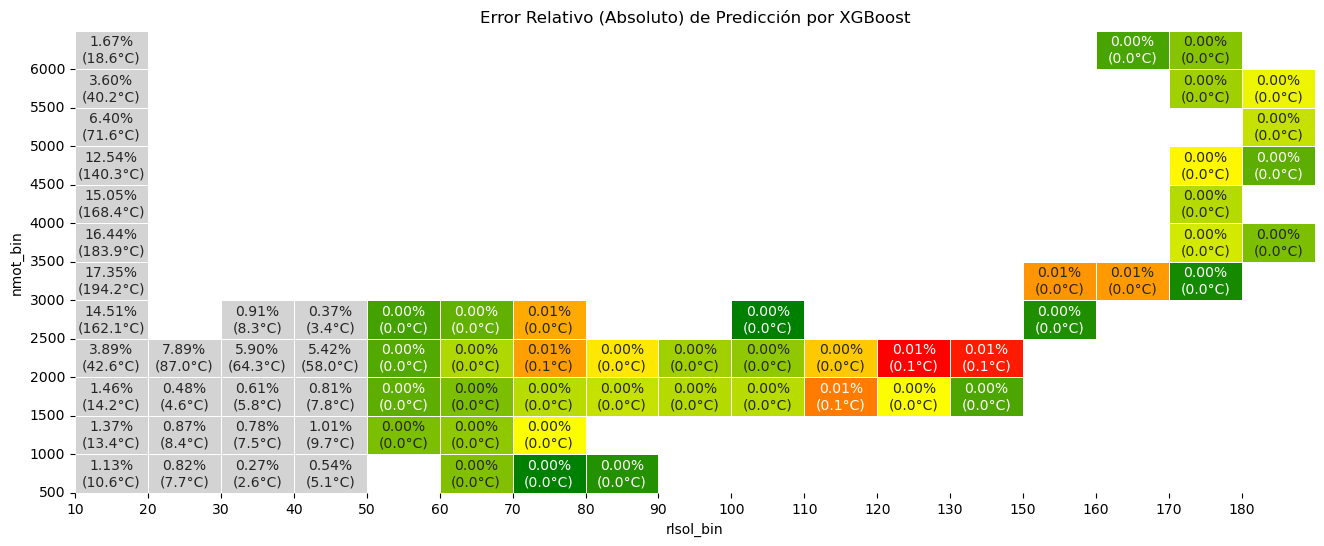

In [363]:
# Errores de XGBoost

# Crear la tabla pivote con el error relativo promedio
heatmap_xgb_rel = df_bins.pivot_table(
    index='nmot_bin', 
    columns='rlsol_bin', 
    values='error_rel_xgb',
    aggfunc=np.mean
)

# Crear la tabla pivote con el error absoluto promedio
heatmap_xgb_abs = df_bins.pivot_table(
    index='nmot_bin', 
    columns='rlsol_bin', 
    values='error_abs_xgb',
    aggfunc=np.mean
)

# Convertir los índices a valores numéricos para mejor visualización
heatmap_xgb_rel.index = heatmap_xgb_rel.index.astype(np.int64)
heatmap_xgb_rel.columns = heatmap_xgb_rel.columns.astype(np.int64)
heatmap_xgb_abs.index = heatmap_xgb_abs.index.astype(np.int64)
heatmap_xgb_abs.columns = heatmap_xgb_abs.columns.astype(np.int64)

# Combinar los datos de ambas tablas en una sola cadena de texto para cada celda
annot_combinado_xgb = heatmap_xgb_rel.copy().astype(str)
for i in range(heatmap_xgb_rel.shape[0]):
    for j in range(heatmap_xgb_rel.shape[1]):
        # Aplico "Fuera de Rango"
        if heatmap_xgb_rel.iloc[i, j] > 999 or heatmap_xgb_abs.iloc[i, j] > 999:
            annot_combinado_xgb.iloc[i, j] = "F/R" # Fuera de Rango, para no ensuciar el gráfico con valores que se salen de la celda
        else:
            annot_combinado_xgb.iloc[i, j] = f"{heatmap_xgb_rel.iloc[i, j]:.2f}%\n({heatmap_xgb_abs.iloc[i, j]:.1f}°C)"

# Crear el heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_xgb_rel, cmap=custom_cmap, cbar=False, annot=annot_combinado_xgb, fmt='', linewidths=0.5, mask=gray_mask)  # Aplicar la máscara para las celdas en gris)

# Añadir título y etiquetas
plt.title('Error Relativo (Absoluto) de Predicción por XGBoost')
plt.xlabel('Carga del Motor Especificada [%] (rlsol_w)')
plt.ylabel('Velocidad del Motor (nmot_w)')

# Heatmap gris
sns.heatmap(
    heatmap_reg_rel, 
    cmap=['lightgray'],
    cbar=False, 
    annot=annot_combinado_xgb, 
    fmt='', 
    linewidths=0.5,
    mask=~gray_mask,  # Invertir la máscara para aplicar el gris solo a las celdas fuera del rango
)
plt.gca().invert_yaxis() # Poner el origen del eje Y abajo

# Ajustar las etiquetas del eje X a la izquierda
plt.xticks(
    ticks=np.arange(len(heatmap_xgb_rel.columns)) + 0,
    labels=heatmap_xgb_rel.columns,
    rotation=0,
)

# Ajustar las etiquetas del eje y abajo
plt.yticks(
    ticks=np.arange(len(heatmap_xgb_rel.index)) + 0,
    labels=heatmap_xgb_rel.index,
    rotation=0,
)

# Mostrar el gráfico
plt.show()